In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [434]:
#Q1.Importing heart and insurance datasets

import os
#print(os.getcwd())
#print(os.listdir(os.getcwd()))
heart = pd.read_csv(r'C:\Users\user\Documents\Data Science\ADS\189ADS Assignment 7\ADS Assignment 7\heart.csv')
insurance = pd.read_csv(r'C:\Users\user\Documents\Data Science\ADS\189ADS Assignment 7\ADS Assignment 7\insurance.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [435]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [436]:
#Q2. renaming the column target to heart disease in the heart dataframe

heart.rename(columns = {'target':'heart disease'}, inplace = True)

In [437]:
#Q3. map encoding the gender category in the dataframe insurance

#insurance.sex.unique() #- check the unique values in the column; ['female', 'male']
#display(insurance.sex.isnull().any()) - check for any missing values before transforming the data; No missing values

insurance["sex"] = insurance["sex"].map({'female':0, 'male':1})
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [438]:
#Alternative to mapping is Label encoding: 

#from sklearn.preprocessing import LabelEncoder
#lbl_enc = LabelEncoder()
#insurance["sex"] = lbl_enc.fit_transform(insurance["sex"])

#Disadvantage: the numeric values can be misinterpreted by algorithms 
#as having some sort of hierarchy/order in them. 

In [439]:
#Q4. Exploratory data analysis

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [440]:
insurance.describe()

,age,sex,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [441]:
#Checking for any null/Nan values
display(insurance.isnull().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [442]:
#Check the different types of regions in the dataframe -(can be numerical categorical)
insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [443]:
#Check types of smokers(numerical-categorical)
insurance.smoker.unique()

array(['yes', 'no'], dtype=object)

In [444]:
#check number of rows and columns
insurance.shape

(1338, 7)

### Insurance DataFrame
1. There are no missing values
2. 4 numerical data, 1 categorical-numerical(sex) and 2 categorical datasets(smoker,region)-which can also be converted to categorical-numerical when creating an ML model 
3. The oldest individual is 64 and the yougest is 18 
4. There are underweight patients with bmi as low as 15 and pateints with morbid obesity with bmi as high as 53.13(very high bmi,feels too positively skewed)
5. The Insurance dataframe has 1338 record entries(individuals) i.e rows and 7 columns

In [445]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age              303 non-null int64
sex              303 non-null int64
cp               303 non-null int64
trestbps         303 non-null int64
chol             303 non-null int64
fbs              303 non-null int64
restecg          303 non-null int64
thalach          303 non-null int64
exang            303 non-null int64
oldpeak          303 non-null float64
slope            303 non-null int64
ca               303 non-null int64
thal             303 non-null int64
heart disease    303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [446]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [447]:
#check for any missing values
display(heart.isnull().any())

age              False
sex              False
cp               False
trestbps         False
chol             False
fbs              False
restecg          False
thalach          False
exang            False
oldpeak          False
slope            False
ca               False
thal             False
heart disease    False
dtype: bool

In [448]:
heart.shape

(303, 14)

### Heart DataFrame

1. No missing values
2. Only has numerical data, perfect for creating an ML model
3. Oldest individual in this dataframe is 77, youngest 29
4. The dataframe has 303 individual entries i.e rows and 14 columns

In [449]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart disease'],
      dtype='object')

In [450]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [451]:
#Q5. Joining the two datarames using the two common columns

df_all = pd.merge(heart, insurance, on=['age','sex'], how='inner') 
df_all

#Used an inner merge since i viewed this as an intersection between the two datasets and not a union. 
#Whereby i want to end up with data from the few individuals who went through a heart check-up and had insurance coverage.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.310,0,no,northwest,13770.09790
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,35.090,0,yes,southeast,47055.53210
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.470,0,no,southeast,13405.39030
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,36.765,0,no,northeast,13981.85035
4,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.325,3,no,northwest,15555.18875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,32.100,3,no,southwest,14007.22200
3419,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,31.350,0,no,northwest,12622.17950
3420,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,26.695,3,no,northwest,14382.70905
3421,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,27.500,0,no,southwest,12233.82800


In [452]:
#removing the duplicated rows from what was in the heart dataframe

df_all = df_all.drop_duplicates(subset=['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','heart disease'])
df_all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.31,0,no,northwest,13770.0979
11,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0,28.31,0,no,northwest,13770.0979
22,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0,28.31,0,no,northwest,13770.0979
33,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0,28.31,0,no,northwest,13770.0979
44,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29.83,2,no,northeast,6406.4107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,39.90,0,yes,southwest,48173.3610
3374,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0,39.90,0,yes,southwest,48173.3610
3386,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,39.10,2,no,southwest,14235.0720
3398,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0,39.10,2,no,southwest,14235.0720


In [453]:
#removing the duplicated rows from what was in the insurance dataframe

df_all = df_all.drop_duplicates(subset=['bmi','children','smoker','region','charges'])
df_all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.310,0,no,northwest,13770.09790
44,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29.830,2,no,northeast,6406.41070
57,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,32.965,0,no,northwest,6571.02435
109,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40.300,0,no,southwest,10602.38500
213,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,31.160,0,yes,northwest,43578.93940
265,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,34.010,0,no,northwest,11356.66090
434,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,39.820,0,no,southeast,11090.71780
473,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,27.400,2,no,southwest,7726.85400
590,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,32.205,3,no,northeast,11488.31695
758,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,33.630,1,no,northwest,10825.25370


In [454]:
df_all.shape

(58, 19)

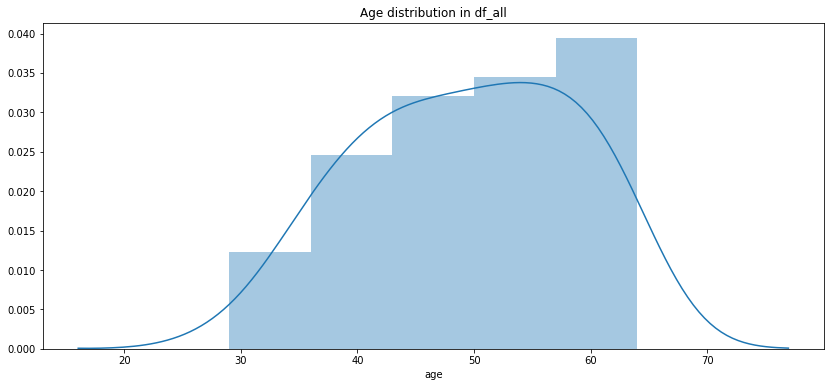

In [455]:
#Q6. Plotting the age distribution in df_all and heart dataframe

plt.figure(figsize=(14,6))
plt.title("Age distribution in df_all")

sns.distplot(df_all.age)

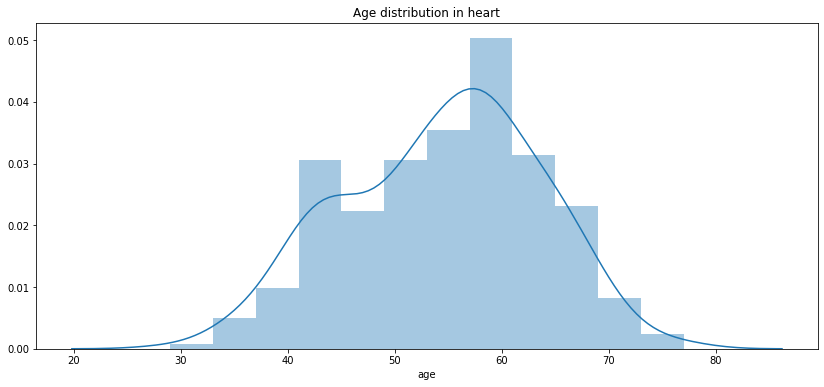

In [456]:
plt.figure(figsize=(14,6))
plt.title("Age distribution in heart")

sns.distplot(heart.age)

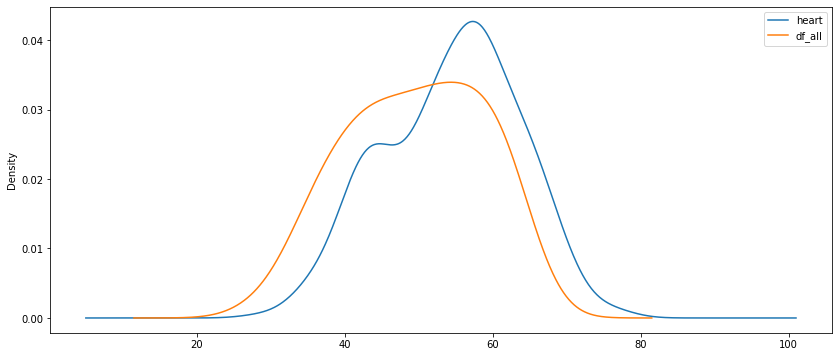

In [457]:
#comparing the two distributions together
plt.figure(figsize=(14,6))
heart.age.plot(kind='kde')
df_all.age.plot(kind='kde')
plt.legend(['heart','df_all'])

### Q7. 
1. The age distribution is a normal distribution in df_all as compared to in heart, where it is skewed abit to the left
2. heart dataframe has older individuals than in df_all
3. majority of the individuals are roughly around the age of 55-60 in both dataframes

In [458]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 3410
Data columns (total 19 columns):
age              58 non-null int64
sex              58 non-null int64
cp               58 non-null int64
trestbps         58 non-null int64
chol             58 non-null int64
fbs              58 non-null int64
restecg          58 non-null int64
thalach          58 non-null int64
exang            58 non-null int64
oldpeak          58 non-null float64
slope            58 non-null int64
ca               58 non-null int64
thal             58 non-null int64
heart disease    58 non-null int64
bmi              58 non-null float64
children         58 non-null int64
smoker           58 non-null object
region           58 non-null object
charges          58 non-null float64
dtypes: float64(3), int64(14), object(2)
memory usage: 9.1+ KB


In [459]:
#list columns and number of unique items in the column
unique = list(map(lambda col: df_all[col].nunique(), df_all.columns))
d = dict(zip(df_all.columns, unique))

sorted(d.items(), key=lambda x: x[1])

[('sex', 2),
 ('fbs', 2),
 ('restecg', 2),
 ('exang', 2),
 ('heart disease', 2),
 ('smoker', 2),
 ('slope', 3),
 ('thal', 3),
 ('cp', 4),
 ('region', 4),
 ('ca', 5),
 ('children', 5),
 ('oldpeak', 19),
 ('trestbps', 23),
 ('age', 31),
 ('thalach', 36),
 ('chol', 48),
 ('bmi', 55),
 ('charges', 58)]

In [460]:
#Q8. Isolating all numerical-continuous column names into a list
#pick the columns with entries more than 5

numerical_continuous = []
for col in df_all.columns:
    if df_all[col].nunique() > 5:
        numerical_continuous.append(col)
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi', 'charges']

In [461]:
#Q9. Creating a list of all numerical-discrete column names

numerical_discrete = []
for col in df_all.columns:
    if df_all[col].nunique() <= 5:
        numerical_discrete.append(col)
numerical_discrete

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'heart disease',
 'children',
 'smoker',
 'region']

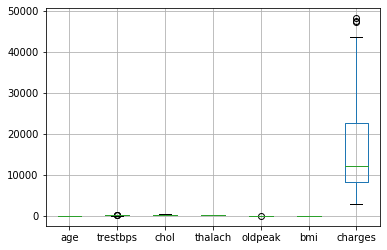

In [462]:
#Q10. Visually identify any outliers
#use a boxplot, If there are no circles or asterisks on either end of the box plot, this is an indication that no outliers are present.

df_all[numerical_continuous].boxplot()


In [463]:
num_con_clean =list(numerical_continuous)

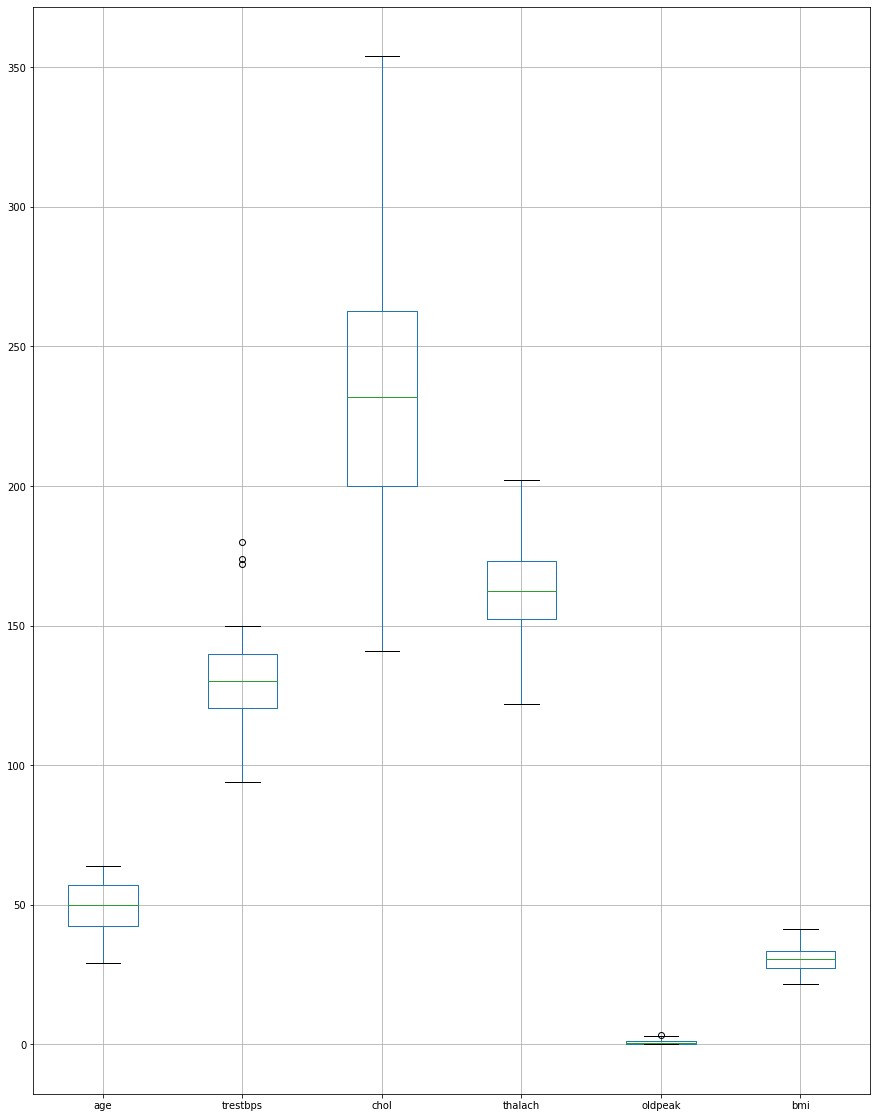

In [464]:
num_con_clean.remove('charges')

plt.figure(figsize=(15,20))
df_all[num_con_clean].boxplot()

#3 outliers in trestbps and 1 outlier in oldpeak

In [465]:
from scipy import stats
zscore = np.abs(stats.zscore(df_all[['trestbps', 'oldpeak']]))
print(zscore)


[[0.85845495 1.96318749]
 [0.05905833 3.42143561]
 [0.05905833 0.8695014 ]
 [0.67073384 0.14037733]
 [0.67073384 0.10266402]
 [0.55261719 0.34570537]
 [0.55261719 0.74798072]
 [0.67073384 0.83178808]
 [2.50997884 0.2241847 ]
 [0.55261719 0.62646004]
 [0.05905833 0.58874673]
 [0.05905833 0.10266402]
 [1.28240936 1.3555841 ]
 [1.16429271 0.38341869]
 [0.67073384 1.11254275]
 [1.16429271 0.99102207]
 [0.24677943 0.2241847 ]
 [0.55261719 0.83178808]
 [1.16429271 0.38341869]
 [0.55261719 0.8695014 ]
 [1.28240936 0.10266402]
 [0.05905833 0.62646004]
 [0.67495229 0.8695014 ]
 [0.24677943 0.83178808]
 [0.55261719 0.99102207]
 [0.05905833 0.58874673]
 [1.64941467 2.81383223]
 [0.05905833 0.34570537]
 [0.55261719 0.83178808]
 [0.43028209 0.83178808]
 [0.05905833 1.3555841 ]
 [1.40474446 0.10266402]
 [0.24677943 0.83178808]
 [0.79306894 0.83178808]
 [0.24677943 0.83178808]
 [0.55261719 0.83178808]
 [0.43028209 0.8695014 ]
 [0.05905833 0.10266402]
 [0.42606363 0.83178808]
 [0.05905833 0.83178808]


In [466]:
threshold = 2.5
np.where(zscore > threshold)

(array([ 1,  8, 26, 46, 57], dtype=int64), array([1, 0, 1, 0, 0], dtype=int64))

(53, 7)

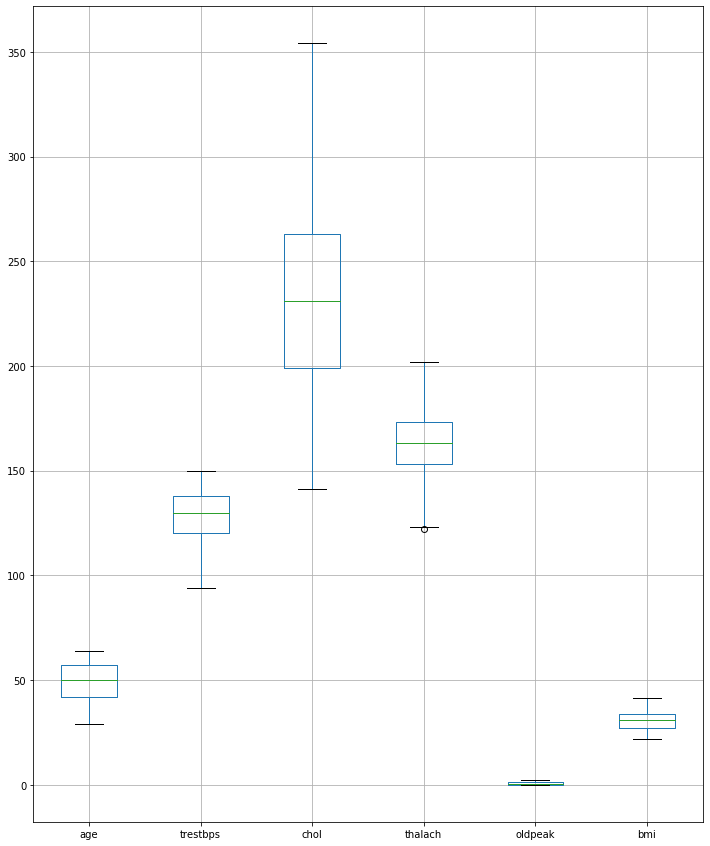

In [467]:
df_all_clean = df_all
df_all_clean = df_all_clean[numerical_continuous][(zscore < threshold).all(axis=1)]


#Q11. Validating the zscore analysis using visualization

plt.figure(figsize=(12,15))
df_all_clean[num_con_clean].boxplot()
df_all_clean.shape

#only one outlier in thalach which can be disregarded

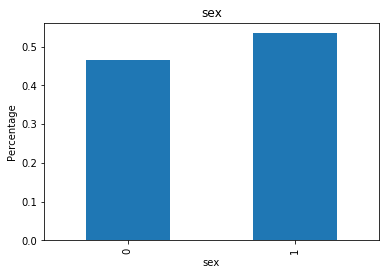

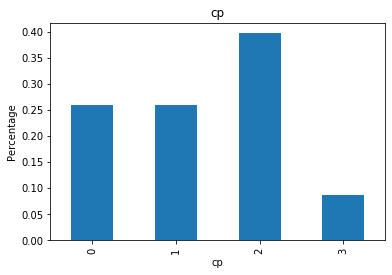

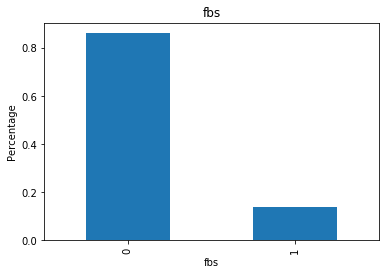

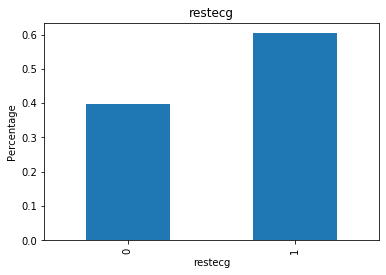

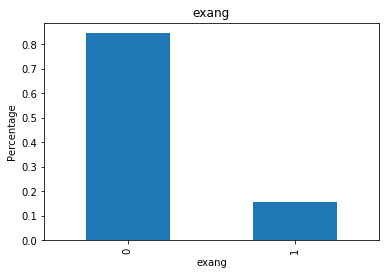

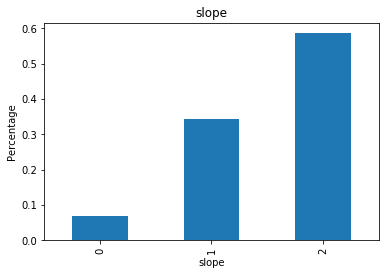

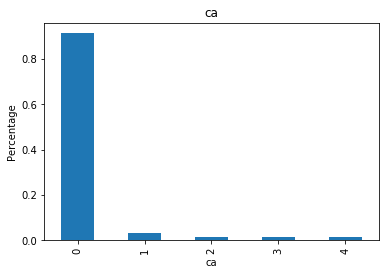

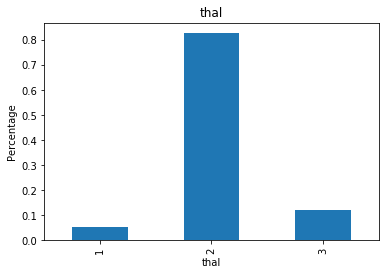

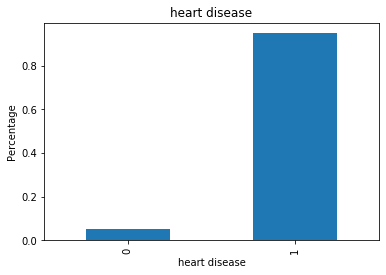

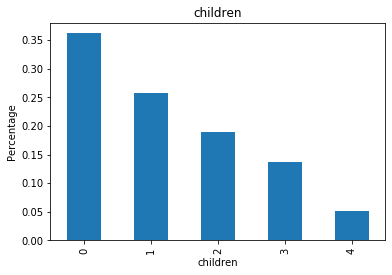

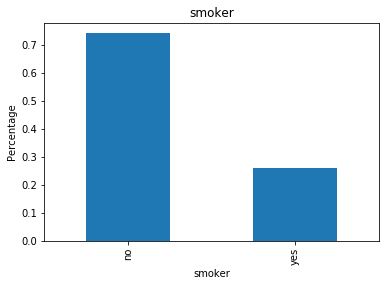

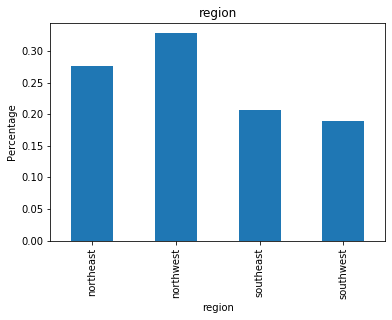

In [468]:
for var in numerical_discrete:
    (df_all.groupby(var)[var].count() / np.float(len(df_all))).plot.bar()
    plt.ylabel('Percentage')
    plt.title(var)
    plt.show()
    print()
    
#will consider outliers to be those values that are present in less than 1% of the indivisuals.
#thus no outliers present in numerical_discrete columns

In [469]:

df_all.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart disease', 'bmi',
       'children', 'smoker', 'region', 'charges'],
      dtype='object')

In [470]:
df_all = pd.concat([df_all_clean, df_all[numerical_discrete]], axis=1)
df_all = df_all.dropna(axis=0)
df_all.shape

(53, 19)

In [471]:
y = df_all.charges
X = df_all[numerical_continuous].drop('charges', axis=1)

X.head()

,age,trestbps,chol,thalach,oldpeak,bmi
0,63.0,145.0,233.0,150.0,2.3,28.310
57,41.0,130.0,204.0,172.0,1.4,32.965
109,56.0,120.0,236.0,178.0,0.8,40.300
213,57.0,120.0,354.0,163.0,0.6,31.160
265,57.0,140.0,192.0,148.0,0.4,34.010


In [472]:
y.head()


0      13770.09790
57      6571.02435
109    10602.38500
213    43578.93940
265    11356.66090
Name: charges, dtype: float64

In [473]:
#Q12. Feature select the best numerical continuous columns using backward elimination

import statsmodels.api as sm

cols = num_con_clean
pmax = 1
while (len(cols)>0):
    p=[]
    X_1 = df_all[cols]
    X_1 = sm.add_constant(X_1) #Adding constant column of ones, mandatory for sm.OLS model
    model = sm.OLS(y,X_1).fit() #Fitting sm.OLS model
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_pmax=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_pmax)
    else:
        break

selected_features_continuous = cols
print(selected_features_continuous)

['age', 'trestbps']


C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [474]:
#Q13. Creating a list of all categorical column names

categorical = list(df_all.select_dtypes('object').columns)
categorical

['smoker', 'region']

In [475]:
num_dis_clean = list(numerical_discrete)
num_dis_clean.remove('heart disease')
num_dis_clean

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'children',
 'smoker',
 'region']

In [476]:
#Q14. Run a chicontingency test to identify the best categorical and numerical_discrete features 

from scipy.stats import chi2_contingency
from scipy.stats import chi2
for i in categorical + numerical_discrete:
    chi_res = chi2_contingency(pd.crosstab(df_all['heart disease'],df_all[i]))
    print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[1], chi_res[2])) #just a sample


Chi2 Statistic: 0.987389620362715, p-value: 1
Chi2 Statistic: 0.030136854214718418, p-value: 3
Chi2 Statistic: 0.5220032735629657, p-value: 1
Chi2 Statistic: 0.06873791591430889, p-value: 3
Chi2 Statistic: 0.6155730234454586, p-value: 1
Chi2 Statistic: 0.3271441076359711, p-value: 1
Chi2 Statistic: 0.5336678452794261, p-value: 1
Chi2 Statistic: 0.8555054866117708, p-value: 2
Chi2 Statistic: 3.1141487274782514e-05, p-value: 4
Chi2 Statistic: 0.20832319417733908, p-value: 2
Chi2 Statistic: 7.096568569499974e-08, p-value: 1
Chi2 Statistic: 0.6135328115522123, p-value: 4
Chi2 Statistic: 0.987389620362715, p-value: 1
Chi2 Statistic: 0.030136854214718418, p-value: 3


In [477]:

chi2_check = []
for i in categorical + num_dis_clean:
    if chi2_contingency(pd.crosstab(df_all['heart disease'],df_all[i]))[1]<0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to reject null hypothesis')
res = pd.DataFrame(data = [categorical + num_dis_clean, chi2_check]).T
res.columns=['Column','Hypothesis']
print(res)

      Column                      Hypothesis
0     smoker  Fail to reject null hypothesis
1     region          Reject Null Hypothesis
2        sex  Fail to reject null hypothesis
3         cp  Fail to reject null hypothesis
4        fbs  Fail to reject null hypothesis
5    restecg  Fail to reject null hypothesis
6      exang  Fail to reject null hypothesis
7      slope  Fail to reject null hypothesis
8         ca          Reject Null Hypothesis
9       thal  Fail to reject null hypothesis
10  children  Fail to reject null hypothesis
11    smoker  Fail to reject null hypothesis
12    region          Reject Null Hypothesis


In [478]:
#Q15. Using ColumnTransformer, OneHotEncode the categorical columns

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_categorical = pd.DataFrame(OH_encoder.fit_transform(df_all[categorical]))

# One-hot encoding removed index; put it back
OH_cols_categorical.index = df_all.index

# Remove categorical columns (will replace with one-hot encoding)
cat_df_all = df_all.drop(categorical, axis=1)

# Add one-hot encoded columns to numerical features
OH_df_all = pd.concat([cat_df_all, OH_cols_categorical], axis=1)

OH_df_all.head()

,age,trestbps,chol,thalach,oldpeak,bmi,charges,sex,cp,fbs,...,ca,thal,heart disease,children,0,1,2,3,4,5
0,63.0,145.0,233.0,150.0,2.3,28.310,13770.09790,1,3,1,...,0,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0
57,41.0,130.0,204.0,172.0,1.4,32.965,6571.02435,0,1,0,...,0,2,1,0,1.0,0.0,0.0,1.0,0.0,0.0
109,56.0,120.0,236.0,178.0,0.8,40.300,10602.38500,1,1,0,...,0,2,1,0,1.0,0.0,0.0,0.0,0.0,1.0
213,57.0,120.0,354.0,163.0,0.6,31.160,43578.93940,0,0,0,...,0,2,1,0,0.0,1.0,0.0,1.0,0.0,0.0
265,57.0,140.0,192.0,148.0,0.4,34.010,11356.66090,1,0,0,...,0,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0
